# ***Data Prep***

In [4]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [8]:
df = pd.read_csv('Ginger.csv', index_col = 'Date', parse_dates=True)

In [9]:
df

,Price
Date,
2021-06-01,110.0
2021-06-02,110.0
2021-06-03,100.0
2021-06-04,100.0
2021-06-05,100.0
...,...
2022-11-26,160.0
2022-11-27,150.0
2022-11-28,160.0


In [10]:
df.dropna()

,Price
Date,
2021-06-01,110.0
2021-06-02,110.0
2021-06-03,100.0
2021-06-04,100.0
2021-06-05,100.0
...,...
2022-11-26,160.0
2022-11-27,150.0
2022-11-28,160.0


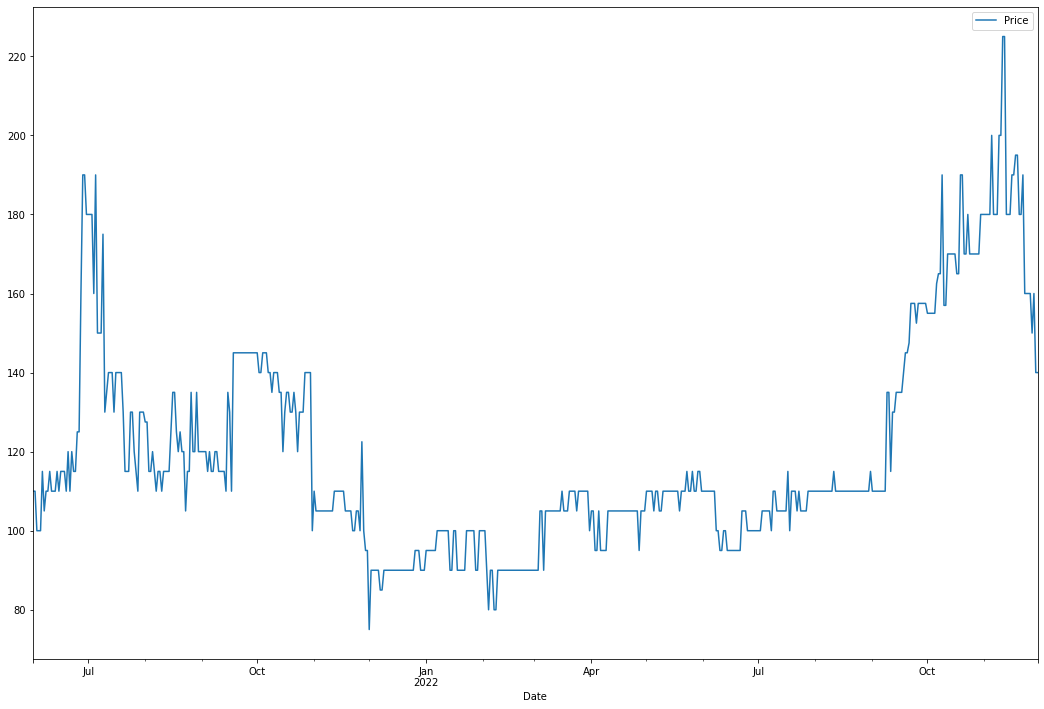

In [11]:
df.plot(figsize = (18, 12));

In [12]:
results = seasonal_decompose(df['Price'], model = 'addtive')

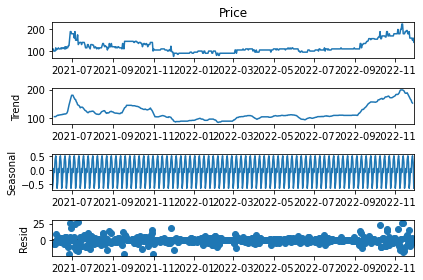

In [13]:
results.plot();

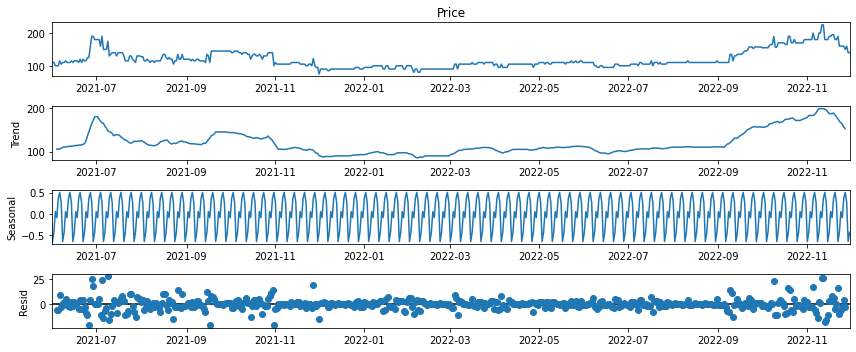

In [14]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

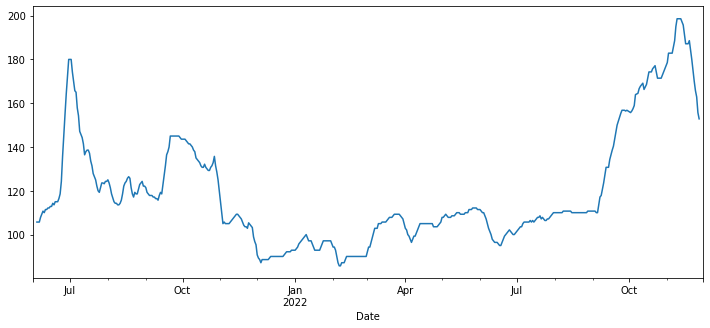

In [15]:
results.trend.plot()

In [16]:
df.index.freq = 'D'

In [17]:
df.head()

,Price
Date,
2021-06-01,110.0
2021-06-02,110.0
2021-06-03,100.0
2021-06-04,100.0
2021-06-05,100.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [19]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [20]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [21]:
test_predictions = fitted_model.forecast(49)

In [22]:
test_predictions

2022-10-14    167.645554
2022-10-15    167.951571
2022-10-16    167.010174
2022-10-17    167.637500
2022-10-18    168.260282
2022-10-19    168.571691
2022-10-20    172.941662
2022-10-21    174.028167
2022-10-22    176.214639
2022-10-23    177.938135
2022-10-24    174.697985
2022-10-25    173.666972
2022-10-26    171.606956
2022-10-27    168.806344
2022-10-28    171.744505
2022-10-29    170.555488
2022-10-30    170.551082
2022-10-31    169.519287
2022-11-01    169.817692
2022-11-02    168.643013
2022-11-03    168.346672
2022-11-04    168.346999
2022-11-05    167.904701
2022-11-06    170.412304
2022-11-07    169.235740
2022-11-08    173.061331
2022-11-09    172.884490
2022-11-10    171.123162
2022-11-11    171.012102
2022-11-12    173.071285
2022-11-13    171.455753
2022-11-14    171.761770
2022-11-15    170.820374
2022-11-16    171.447699
2022-11-17    172.070481
2022-11-18    172.381890
2022-11-19    176.751861
2022-11-20    177.838367
2022-11-21    180.024839
2022-11-22    181.748334


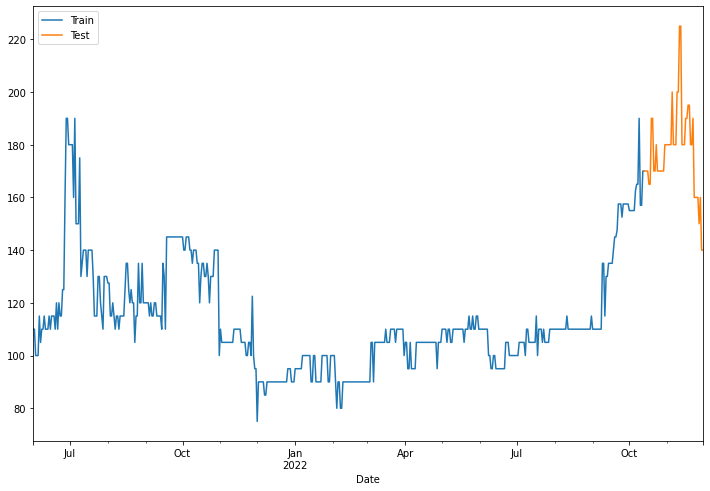

In [23]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [24]:
test_data.describe()

,Price
count,49.000000
mean,177.346939
std,16.835665
min,140.000000
25%,170.000000
50%,180.000000
75%,180.000000
max,225.000000


In [25]:
mean_absolute_error(test_data,test_predictions)


13.071402634083736

In [26]:
mean_squared_error(test_data, test_predictions)

315.0708963242366

In [27]:
from statsmodels.tools.eval_measures import rmse

In [28]:
rmse(test_data, test_predictions)

array([19.28139049, 19.12924677, 19.60876962, 19.28544391, 18.97952789,
       18.83242204, 17.23547528, 16.99027332, 16.70141447, 16.67347163,
       16.87222867, 17.06450407, 17.62391965, 18.72423299, 17.5796019 ,
       17.99385853, 17.9955222 , 18.40997768, 18.28509489, 18.79929415,
       18.93831932, 18.93816431, 19.15231041, 18.0483877 , 18.53231487,
       17.20527761, 17.25017652, 17.78737034, 17.82653346, 17.20280087,
       17.67374362, 17.57410738, 17.89556358, 17.67642976, 17.47844809,
       17.38697357, 16.67360971, 16.67023231, 16.87679748, 17.23448359,
       16.7034019 , 16.66349616, 16.77436158, 17.32142553, 16.75909443,
       16.9275811 , 16.92835775, 17.14045122, 17.07297437])

In [29]:
np.sqrt(mean_squared_error(test_data, test_predictions))

17.75023651459993

In [30]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [31]:
forecast_predictions = final_model.forecast(60)

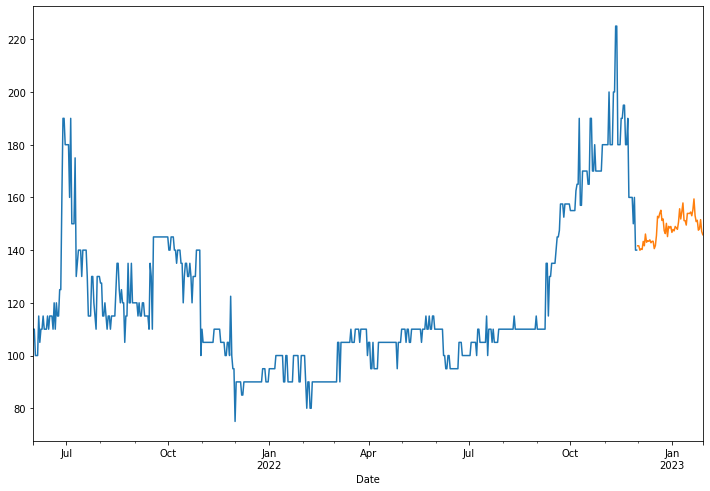

In [32]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [33]:
forecast_predictions

2022-12-01    141.629995
2022-12-02    141.632107
2022-12-03    139.963186
2022-12-04    140.517422
2022-12-05    140.240726
2022-12-06    143.305040
2022-12-07    141.648680
2022-12-08    146.099374
2022-12-09    142.996347
2022-12-10    143.563403
2022-12-11    143.343581
2022-12-12    143.901625
2022-12-13    142.781341
2022-12-14    143.342728
2022-12-15    143.347098
2022-12-16    140.568693
2022-12-17    141.688026
2022-12-18    145.577599
2022-12-19    152.817529
2022-12-20    152.285911
2022-12-21    153.982881
2022-12-22    155.121953
2022-12-23    151.254189
2022-12-24    151.821236
2022-12-25    147.392925
2022-12-26    146.273266
2022-12-27    150.159497
2022-12-28    145.133244
2022-12-29    149.003596
2022-12-30    148.416250
2022-12-31    148.965255
2023-01-01    146.730576
2023-01-02    147.849685
2023-01-03    147.300936
2023-01-04    148.977392
2023-01-05    148.436749
2023-01-06    147.894145
2023-01-07    150.684541
2023-01-08    155.692452
2023-01-09    151.808801


# *SARIMAX*

In [34]:
from datetime import datetime

In [35]:
df_KN = pd.read_csv('Ginger.csv', index_col = 'Date', parse_dates = True)

In [36]:
df_KN.index.freq ='D'

In [37]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [38]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [39]:
adf_test(df_KN['Price'])

ADF Statistics: -2.116529916923875
p- value: 0.23791999513882117
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [40]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [41]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,110.0,NaN
2021-06-02,110.0,0.0
2021-06-03,100.0,-10.0
2021-06-04,100.0,0.0
2021-06-05,100.0,0.0


In [42]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: -2.116529916923875
p- value: 0.23791999513882117
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [43]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [44]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -10.891880647792632
p- value: 1.2192872529152565e-19
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [45]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [46]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -4.1255828330617685
p- value: 0.0008784004291901043
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


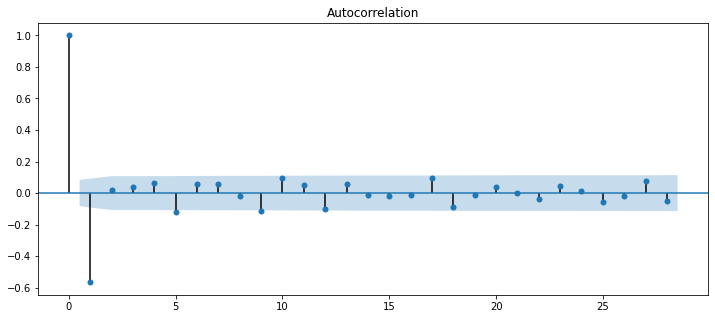

In [47]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

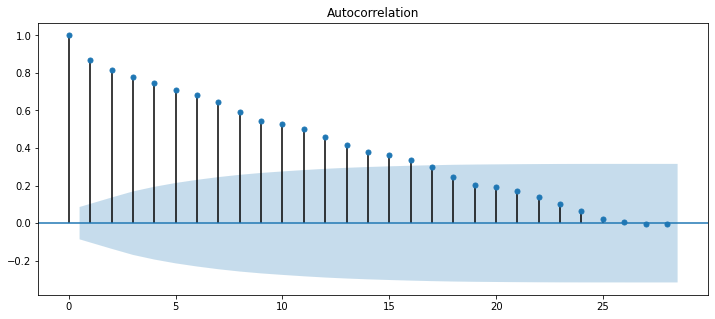

In [48]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

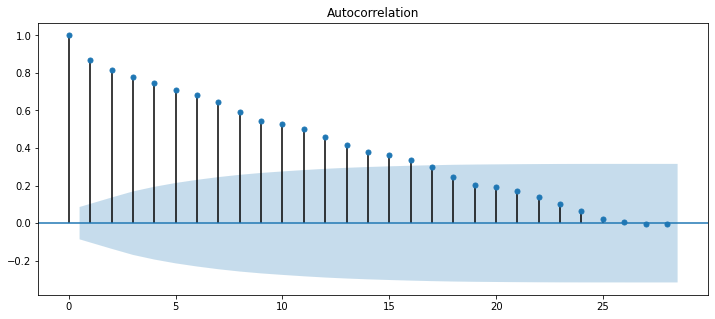

In [49]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

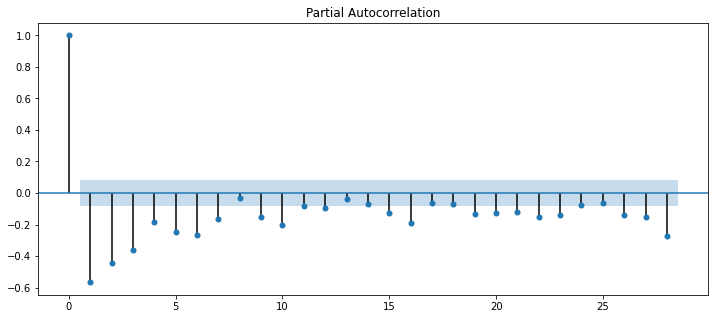

In [50]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [51]:

from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [52]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [53]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [54]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,155.0,0.0,2.5,45.0
2022-10-03,155.0,0.0,0.0,45.0
2022-10-04,155.0,0.0,0.0,45.0
2022-10-05,155.0,0.0,0.0,45.0
2022-10-06,162.5,7.5,7.5,52.5
2022-10-07,165.0,2.5,-5.0,55.0
2022-10-08,165.0,0.0,-2.5,55.0
2022-10-09,190.0,25.0,25.0,55.0
2022-10-10,157.0,-33.0,-58.0,22.0


In [55]:
import statsmodels.api as sm

In [56]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from pmdarima import ARIMA

In [59]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,110.0,NaN,NaN,NaN
2021-06-02,110.0,0.0,NaN,NaN
2021-06-03,100.0,-10.0,-10.0,NaN
2021-06-04,100.0,0.0,10.0,NaN
2021-06-05,100.0,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,157.5,0.0,-5.0,47.5
2022-09-28,157.5,0.0,0.0,47.5
2022-09-29,157.5,0.0,0.0,47.5


In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [61]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [62]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [63]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood               -1665.116
Date:                             Fri, 06 Jan 2023   AIC                           3348.232
Time:                                     23:34:56   BIC                           3385.374
Sample:                                 06-01-2021   HQIC                          3362.861
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7205      0.019     91.245      0.000       1.684       1.757
ar.L2         -1.6899      0.025    -67.376      0.000      -1.739      -1.641
ar.L3          0.9658      0.019     50.505      0.000       0.928       1.003
ma.L1         -1.1979      0.034    -35.064      0.000      -1.265      -1.131
ma.L2          1.3033      0.060     21.701      0.000       1.186       1.421
ma.L3         -0.3520      0.077     -4.563      0.000      -0.503      -0.201
ma.L4         -0.1326      0.064     -2.087      0.037      -0.257      -0.008
ma.L5          0.1487      0.044      3.367      0.001       0.062       0.235
sigma2        83.3920      3.364     24.789      0.000      76.799      89.985
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               984.38
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [65]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

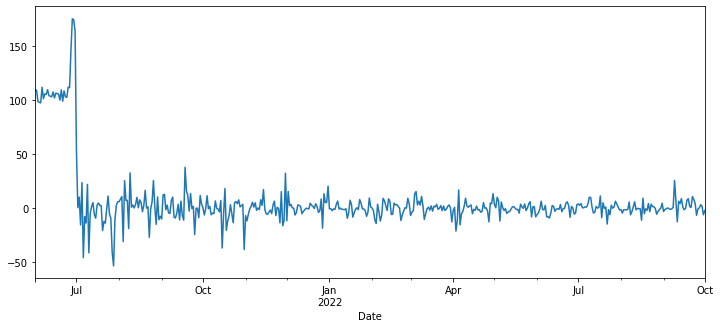

In [66]:
model_SARIMAX_fit.resid.plot()

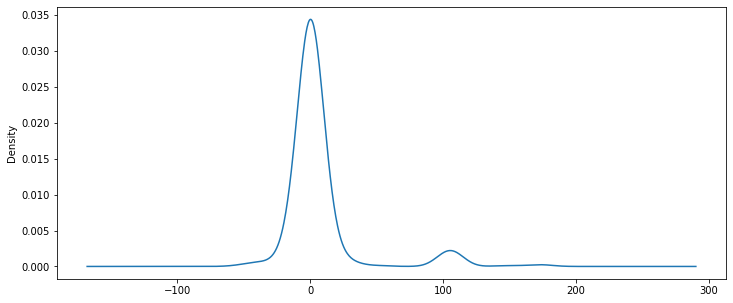

In [67]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [68]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [69]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,155.0,0.0,2.5,45.0,155.061857
2022-10-03,155.0,0.0,0.0,45.0,152.286082
2022-10-04,155.0,0.0,0.0,45.0,151.837251
2022-10-05,155.0,0.0,0.0,45.0,153.424023
2022-10-06,162.5,7.5,7.5,52.5,154.555690
2022-10-07,165.0,2.5,-5.0,55.0,153.683211
2022-10-08,165.0,0.0,-2.5,55.0,151.802286
2022-10-09,190.0,25.0,25.0,55.0,176.133567
2022-10-10,157.0,-33.0,-58.0,22.0,177.318929


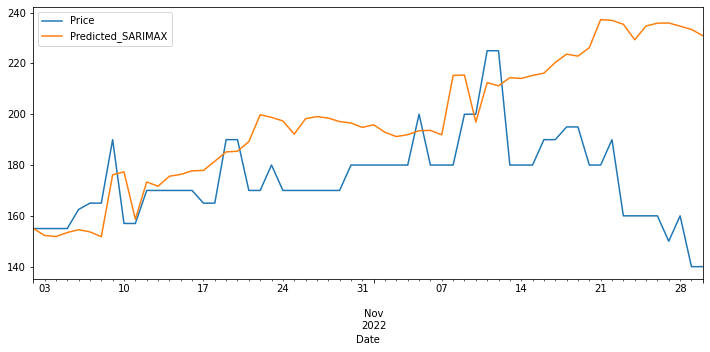

In [70]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [71]:
pred_Sarimax

2022-10-02    155.061857
2022-10-03    152.286082
2022-10-04    151.837251
2022-10-05    153.424023
2022-10-06    154.555690
2022-10-07    153.683211
2022-10-08    151.802286
2022-10-09    176.133567
2022-10-10    177.318929
2022-10-11    158.671736
2022-10-12    173.350227
2022-10-13    171.655844
2022-10-14    175.590576
2022-10-15    176.310589
2022-10-16    177.713058
2022-10-17    177.880382
2022-10-18    181.493657
2022-10-19    185.179604
2022-10-20    185.423808
2022-10-21    189.225218
2022-10-22    199.782449
2022-10-23    198.777784
2022-10-24    197.364554
2022-10-25    192.169072
2022-10-26    198.250610
2022-10-27    199.076786
2022-10-28    198.481734
2022-10-29    197.106392
2022-10-30    196.543652
2022-10-31    194.824918
2022-11-01    195.853554
2022-11-02    192.877348
2022-11-03    191.204503
2022-11-04    191.957825
2022-11-05    193.530415
2022-11-06    193.642785
2022-11-07    191.906201
2022-11-08    215.247393
2022-11-09    215.436597
2022-11-10    196.888074


In [72]:
predicted_value_SARIMA = pred_Sarimax

In [73]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [74]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

26.206481145272605

In [75]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

1287.354445981496

In [76]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

35.87972193288984

# ***FB Prophet***

In [77]:
df_fb  = pd.read_csv('Ginger.csv')

In [78]:
df_fb.columns = ['ds', 'y']

In [79]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [80]:
df_fb.head()

,ds,y
0,2021-06-01,110.0
1,2021-06-02,110.0
2,2021-06-03,100.0
3,2021-06-04,100.0
4,2021-06-05,100.0


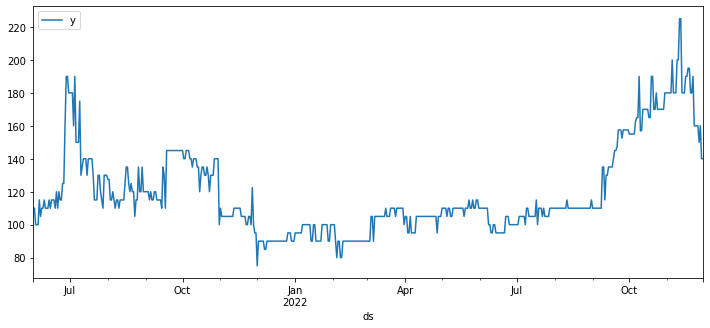

In [81]:
df_fb.plot(x='ds', y='y')

In [82]:
len(df_fb)

548

In [83]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [84]:
import prophet

In [85]:
import io, os, sys, setuptools, tokenize

In [86]:
from fbprophet import Prophet

In [87]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [88]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,143.819071,126.676987,161.502860,140.839751,146.931344,-0.045254,-0.045254,-0.045254,-0.045254,-0.045254,-0.045254,0.0,0.0,0.0,143.773817
544,2022-11-27,144.063382,126.893798,161.298682,141.001456,147.249977,0.458962,0.458962,0.458962,0.458962,0.458962,0.458962,0.0,0.0,0.0,144.522344
545,2022-11-28,144.307692,128.063703,162.708699,141.150414,147.598224,0.964892,0.964892,0.964892,0.964892,0.964892,0.964892,0.0,0.0,0.0,145.272585
546,2022-11-29,144.552003,127.704203,161.321327,141.306256,147.947831,-0.346953,-0.346953,-0.346953,-0.346953,-0.346953,-0.346953,0.0,0.0,0.0,144.205050
547,2022-11-30,144.796313,128.123917,160.965600,141.478988,148.284232,-0.529581,-0.529581,-0.529581,-0.529581,-0.529581,-0.529581,0.0,0.0,0.0,144.266733


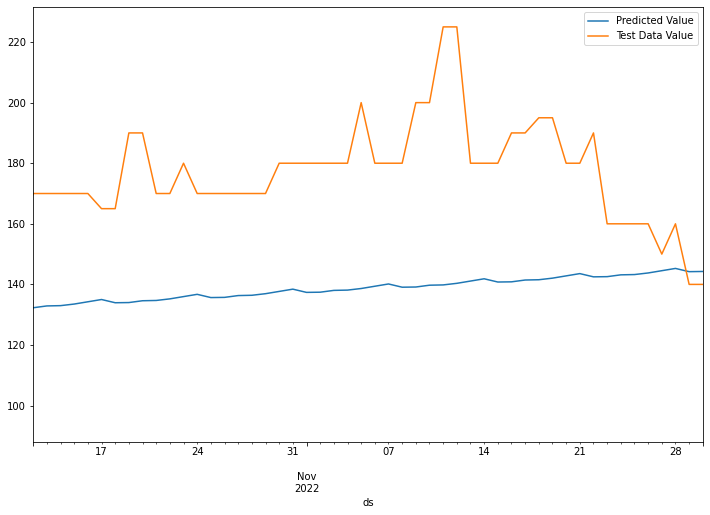

In [89]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [90]:
from statsmodels.tools.eval_measures import rmse

In [91]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [92]:
predictions_fb

488    130.840956
489    131.591197
490    130.523662
491    130.585345
492    131.183216
493    131.277500
494    131.802603
495    132.551129
496    133.301370
497    132.233836
498    132.295519
499    132.893389
500    132.987674
501    133.512776
502    134.261303
503    135.011544
504    133.944009
505    134.005692
506    134.603563
507    134.697847
508    135.222950
509    135.971476
510    136.721717
511    135.654183
512    135.715865
513    136.313736
514    136.408021
515    136.933123
516    137.681650
517    138.431891
518    137.364356
519    137.426039
520    138.023910
521    138.118194
522    138.643297
523    139.391823
524    140.142064
525    139.074530
526    139.136212
527    139.734083
528    139.828368
529    140.353470
530    141.101997
531    141.852238
532    140.784703
533    140.846386
534    141.444257
535    141.538541
536    142.063644
537    142.812170
538    143.562411
539    142.494877
540    142.556559
541    143.154430
542    143.248715
543    143

In [93]:
test_fb

,ds,y
488,2022-10-02,155.0
489,2022-10-03,155.0
490,2022-10-04,155.0
491,2022-10-05,155.0
492,2022-10-06,162.5
493,2022-10-07,165.0
494,2022-10-08,165.0
495,2022-10-09,190.0
496,2022-10-10,157.0
497,2022-10-11,157.0


In [94]:
mean_absolute_error(test_fb['y'], predictions_fb)

37.29245032480073

In [95]:
mean_squared_error(test_fb['y'], predictions_fb)

1641.6792724510283

In [96]:
rmse(predictions_fb, test_fb['y'])

40.51764149664968

In [97]:
test_fb.mean()

y    174.608333
dtype: float64

In [98]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [99]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [100]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [101]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,108.485516,91.035642,124.567356,110.0,2022-08-02
1,2022-08-04,108.849638,91.860560,125.236230,110.0,2022-08-02
2,2022-08-05,108.472616,92.250232,124.183538,110.0,2022-08-02
3,2022-08-06,108.957772,92.512813,125.022221,110.0,2022-08-02
4,2022-08-07,110.389852,93.028154,125.910472,110.0,2022-08-02


In [102]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,1.273775,1.128617,1.049750,0.009543,0.009966,1.000000
1,7 days,0.972929,0.986372,0.913834,0.008308,0.007915,1.000000
2,8 days,0.921391,0.959891,0.889945,0.008090,0.007755,1.000000
3,9 days,5.839641,2.416535,1.575865,0.013954,0.007755,1.000000
4,10 days,5.831977,2.414949,1.572149,0.013921,0.007755,1.000000
5,11 days,5.854310,2.419568,1.596302,0.014140,0.007755,1.000000
6,12 days,5.912748,2.431614,1.633489,0.014478,0.008656,1.000000
7,13 days,6.064031,2.462525,1.713931,0.015209,0.009213,1.000000
8,14 days,5.901127,2.429224,1.578015,0.013974,0.008715,1.000000
9,15 days,0.635656,0.797280,0.720793,0.006553,0.006509,1.000000


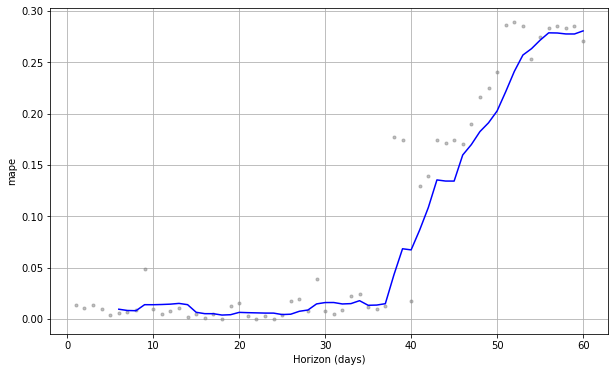

In [103]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [104]:
df_t = pd.read_csv('Ginger.csv')

In [105]:
df_t.columns = ['ds', 'y']

In [106]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [107]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [108]:
t.fit(df_t)

In [109]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

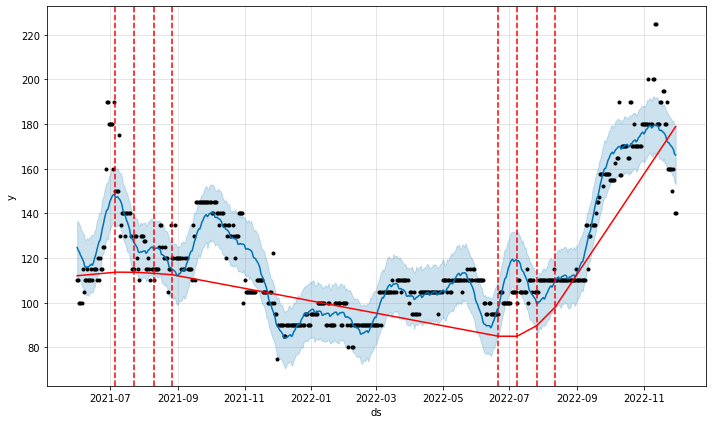

In [110]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [111]:
df_S = pd.read_csv('Ginger.csv')

In [112]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


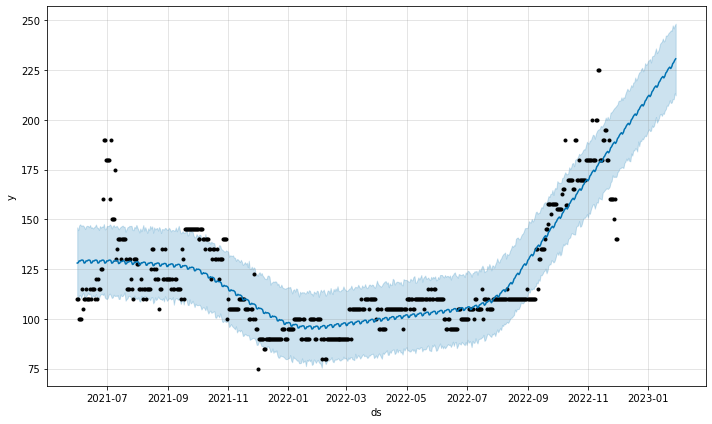

In [113]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

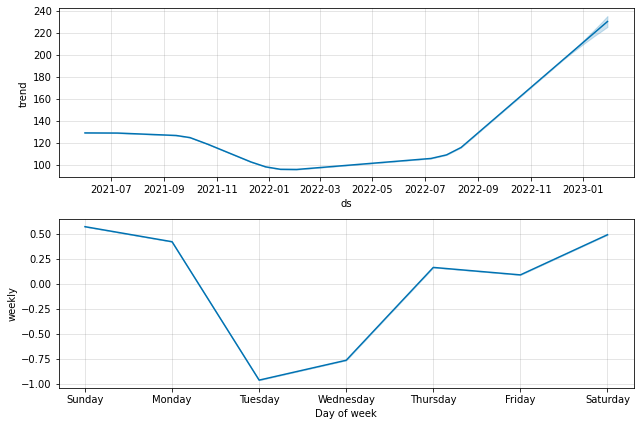

In [114]:
figure = S.plot_components(forecast);

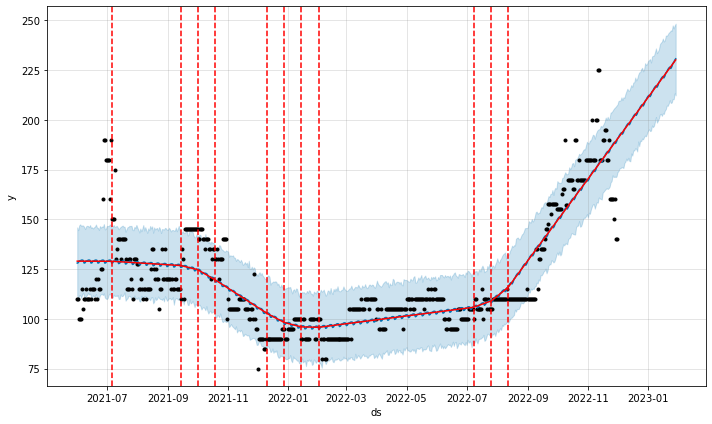

In [115]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


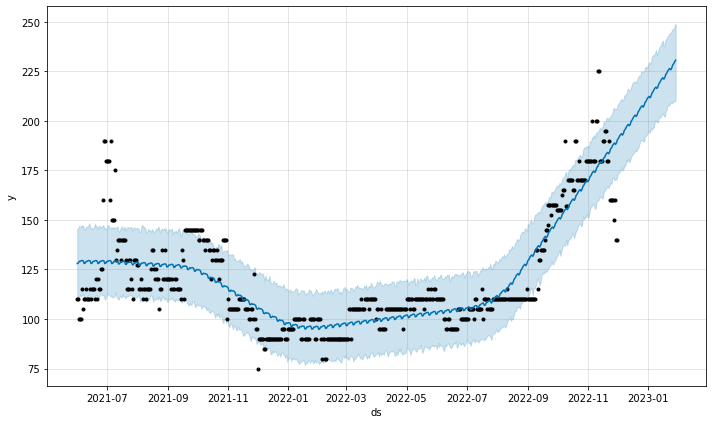

In [116]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

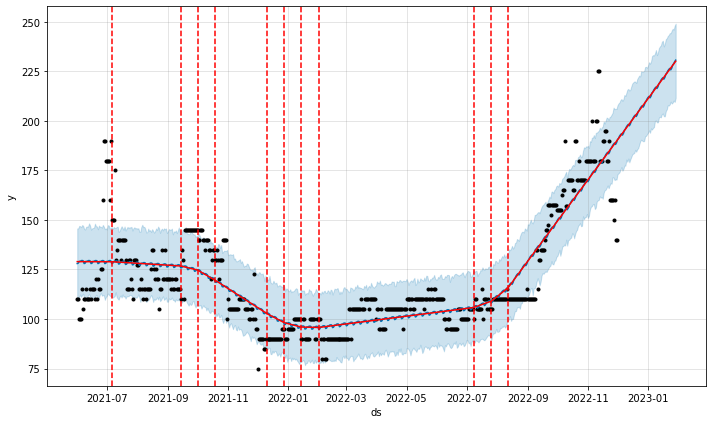

In [117]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

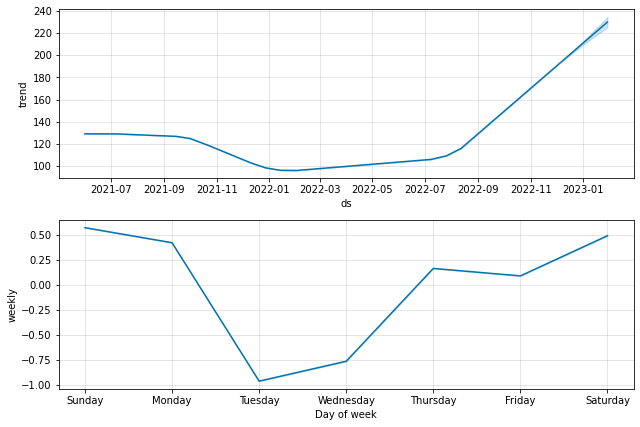

In [118]:
figure = S.plot_components(forecast)

# ***LSTM***

In [119]:
df_LSTM=pd.read_csv("Ginger.csv",parse_dates=["Date"],index_col=[0])

In [120]:
print(df_LSTM.index.freq)

None


In [121]:
test_split=round(len(df_LSTM)*0.20)

In [122]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [123]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [124]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [125]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [126]:
df_for_training_scaled

array([[0.30434783],
       [0.30434783],
       [0.2173913 ],
       [0.2173913 ],
       [0.2173913 ],
       [0.34782609],
       [0.26086957],
       [0.30434783],
       [0.30434783],
       [0.34782609],
       [0.30434783],
       [0.30434783],
       [0.30434783],
       [0.34782609],
       [0.30434783],
       [0.34782609],
       [0.34782609],
       [0.34782609],
       [0.30434783],
       [0.39130435],
       [0.30434783],
       [0.39130435],
       [0.34782609],
       [0.34782609],
       [0.43478261],
       [0.43478261],
       [0.73913043],
       [1.        ],
       [1.        ],
       [0.91304348],
       [0.91304348],
       [0.91304348],
       [0.91304348],
       [0.73913043],
       [1.        ],
       [0.65217391],
       [0.65217391],
       [0.65217391],
       [0.86956522],
       [0.47826087],
       [0.52173913],
       [0.56521739],
       [0.56521739],
       [0.56521739],
       [0.47826087],
       [0.56521739],
       [0.56521739],
       [0.565

In [127]:
df_for_training_scaled.shape

(438, 1)

In [128]:
df_for_testing_scaled.shape

(110, 1)

In [129]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [130]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [131]:
trainX.shape

(408, 30, 1)

In [132]:
testX,testY=createXY(df_for_testing_scaled,30)

In [133]:
trainX[0]

array([[0.30434783],
       [0.30434783],
       [0.2173913 ],
       [0.2173913 ],
       [0.2173913 ],
       [0.34782609],
       [0.26086957],
       [0.30434783],
       [0.30434783],
       [0.34782609],
       [0.30434783],
       [0.30434783],
       [0.30434783],
       [0.34782609],
       [0.30434783],
       [0.34782609],
       [0.34782609],
       [0.34782609],
       [0.30434783],
       [0.39130435],
       [0.30434783],
       [0.39130435],
       [0.34782609],
       [0.34782609],
       [0.43478261],
       [0.43478261],
       [0.73913043],
       [1.        ],
       [1.        ],
       [0.91304348]])

In [134]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [135]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [136]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.30434783]
 [0.30434783]
 [0.2173913 ]
 [0.2173913 ]
 [0.2173913 ]
 [0.34782609]
 [0.26086957]
 [0.30434783]
 [0.30434783]
 [0.34782609]
 [0.30434783]
 [0.30434783]
 [0.30434783]
 [0.34782609]
 [0.30434783]
 [0.34782609]
 [0.34782609]
 [0.34782609]
 [0.30434783]
 [0.39130435]
 [0.30434783]
 [0.39130435]
 [0.34782609]
 [0.34782609]
 [0.43478261]
 [0.43478261]
 [0.73913043]
 [1.        ]
 [1.        ]
 [0.91304348]]

trainY[0]--  0.9130434782608696


In [137]:
trainY[0]

0.9130434782608696

In [138]:
trainY.shape

(408,)

In [139]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [140]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 5s 116ms/step - loss: 0.0189 - val_loss: 0.0601
Epoch 2/32
13/13 [==============================] - 0s 33ms/step - loss: 0.0045 - val_loss: 0.1143
Epoch 3/32
13/13 [==============================] - 0s 30ms/step - loss: 0.0037 - val_loss: 0.0868
Epoch 4/32
13/13 [==============================] - 0s 31ms/step - loss: 0.0030 - val_loss: 0.0892
Epoch 5/32
13/13 [==============================] - 0s 28ms/step - loss: 0.0027 - val_loss: 0.0666
Epoch 6/32
13/13 [==============================] - 0s 31ms/step - loss: 0.0029 - val_loss: 0.0673
Epoch 7/32
13/13 [==============================] - 0s 30ms/step - loss: 0.0029 - val_loss: 0.0638
Epoch 8/32
13/13 [==============================] - 0s 30ms/step - loss: 0.0027 - val_loss: 0.0481
Epoch 9/32
13/13 [==============================] - 0s 31ms/step - loss: 0.0023 - val_loss: 0.0427
Epoch 10/32
13/13 [==============================] - 0s 30ms/step - loss: 0.0024 - val_loss: 0.0464
Epoch 11

In [141]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 64, 'optimizer': 'adam'}

In [142]:
my_model=grid_search.best_estimator_.model

In [143]:
my_model

In [144]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 9ms/step


In [145]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.4190632 ]
 [0.4310184 ]
 [0.44328383]
 [0.46438998]
 [0.48166376]
 [0.492244  ]
 [0.49719948]
 [0.5115385 ]
 [0.5372224 ]
 [0.558204  ]
 [0.57745504]
 [0.6166677 ]
 [0.6483407 ]
 [0.6663164 ]
 [0.65908146]
 [0.6603257 ]
 [0.66302496]
 [0.665339  ]
 [0.666888  ]
 [0.66782886]
 [0.6614881 ]
 [0.6554822 ]
 [0.65179867]
 [0.65031993]
 [0.65025216]
 [0.6715837 ]
 [0.6988954 ]
 [0.71824425]
 [0.8015201 ]
 [0.7726158 ]
 [0.7242074 ]
 [0.7230167 ]
 [0.7353872 ]
 [0.748252  ]
 [0.7569795 ]
 [0.76128906]
 [0.7481069 ]
 [0.7348969 ]
 [0.79933053]
 [0.86315703]
 [0.8406652 ]
 [0.8027869 ]
 [0.80281943]
 [0.7836158 ]
 [0.7675772 ]
 [0.75883806]
 [0.7561189 ]
 [0.7568253 ]
 [0.7587595 ]
 [0.78979784]
 [0.8175313 ]
 [0.8335565 ]
 [0.839109  ]
 [0.8384644 ]
 [0.8354868 ]
 [0.8935836 ]
 [0.88332814]
 [0.8590224 ]
 [0.8393222 ]
 [0.8891106 ]
 [0.9394865 ]
 [1.051743  ]
 [1.1323608 ]
 [1.0146623 ]
 [0.90043163]
 [0.83231616]
 [0.83395004]
 [0.85773754]
 [0.8973642 ]
 [0.927227  ]
 [0.8959

In [146]:
scaler.inverse_transform(prediction)

array([[123.19227 ],
       [124.56712 ],
       [125.977646],
       [128.40485 ],
       [130.39134 ],
       [131.60806 ],
       [132.17795 ],
       [133.82692 ],
       [136.78056 ],
       [139.19347 ],
       [141.40733 ],
       [145.9168  ],
       [149.55917 ],
       [151.62637 ],
       [150.79436 ],
       [150.93745 ],
       [151.24788 ],
       [151.51398 ],
       [151.69211 ],
       [151.80032 ],
       [151.07114 ],
       [150.38045 ],
       [149.95685 ],
       [149.78679 ],
       [149.779   ],
       [152.23213 ],
       [155.37297 ],
       [157.5981  ],
       [167.1748  ],
       [163.85081 ],
       [158.28384 ],
       [158.14693 ],
       [159.56952 ],
       [161.04898 ],
       [162.05264 ],
       [162.54825 ],
       [161.0323  ],
       [159.51314 ],
       [166.92302 ],
       [174.26306 ],
       [171.6765  ],
       [167.3205  ],
       [167.32423 ],
       [165.11581 ],
       [163.27138 ],
       [162.26637 ],
       [161.95367 ],
       [162.0

In [147]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [148]:
prediction_copies_array.shape

(80, 1)

In [149]:
prediction_copies_array

array([[0.4190632 ],
       [0.4310184 ],
       [0.44328383],
       [0.46438998],
       [0.48166376],
       [0.492244  ],
       [0.49719948],
       [0.5115385 ],
       [0.5372224 ],
       [0.558204  ],
       [0.57745504],
       [0.6166677 ],
       [0.6483407 ],
       [0.6663164 ],
       [0.65908146],
       [0.6603257 ],
       [0.66302496],
       [0.665339  ],
       [0.666888  ],
       [0.66782886],
       [0.6614881 ],
       [0.6554822 ],
       [0.65179867],
       [0.65031993],
       [0.65025216],
       [0.6715837 ],
       [0.6988954 ],
       [0.71824425],
       [0.8015201 ],
       [0.7726158 ],
       [0.7242074 ],
       [0.7230167 ],
       [0.7353872 ],
       [0.748252  ],
       [0.7569795 ],
       [0.76128906],
       [0.7481069 ],
       [0.7348969 ],
       [0.79933053],
       [0.86315703],
       [0.8406652 ],
       [0.8027869 ],
       [0.80281943],
       [0.7836158 ],
       [0.7675772 ],
       [0.75883806],
       [0.7561189 ],
       [0.756

In [150]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [151]:
pred

array([123.19227 , 124.56712 , 125.977646, 128.40485 , 130.39134 ,
       131.60806 , 132.17795 , 133.82692 , 136.78056 , 139.19347 ,
       141.40733 , 145.9168  , 149.55917 , 151.62637 , 150.79436 ,
       150.93745 , 151.24788 , 151.51398 , 151.69211 , 151.80032 ,
       151.07114 , 150.38045 , 149.95685 , 149.78679 , 149.779   ,
       152.23213 , 155.37297 , 157.5981  , 167.1748  , 163.85081 ,
       158.28384 , 158.14693 , 159.56952 , 161.04898 , 162.05264 ,
       162.54825 , 161.0323  , 159.51314 , 166.92302 , 174.26306 ,
       171.6765  , 167.3205  , 167.32423 , 165.11581 , 163.27138 ,
       162.26637 , 161.95367 , 162.03491 , 162.25734 , 165.82675 ,
       169.0161  , 170.859   , 171.49754 , 171.4234  , 171.081   ,
       177.76212 , 176.58273 , 173.78757 , 171.52205 , 177.24773 ,
       183.04094 , 195.95044 , 205.2215  , 191.68616 , 178.54964 ,
       170.71635 , 170.90425 , 173.63982 , 178.19688 , 181.6311  ,
       178.0343  , 173.99979 , 174.77158 , 166.36859 , 159.132

In [152]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [153]:
pred

array([123.19227 , 124.56712 , 125.977646, 128.40485 , 130.39134 ,
       131.60806 , 132.17795 , 133.82692 , 136.78056 , 139.19347 ,
       141.40733 , 145.9168  , 149.55917 , 151.62637 , 150.79436 ,
       150.93745 , 151.24788 , 151.51398 , 151.69211 , 151.80032 ,
       151.07114 , 150.38045 , 149.95685 , 149.78679 , 149.779   ,
       152.23213 , 155.37297 , 157.5981  , 167.1748  , 163.85081 ,
       158.28384 , 158.14693 , 159.56952 , 161.04898 , 162.05264 ,
       162.54825 , 161.0323  , 159.51314 , 166.92302 , 174.26306 ,
       171.6765  , 167.3205  , 167.32423 , 165.11581 , 163.27138 ,
       162.26637 , 161.95367 , 162.03491 , 162.25734 , 165.82675 ,
       169.0161  , 170.859   , 171.49754 , 171.4234  , 171.081   ,
       177.76212 , 176.58273 , 173.78757 , 171.52205 , 177.24773 ,
       183.04094 , 195.95044 , 205.2215  , 191.68616 , 178.54964 ,
       170.71635 , 170.90425 , 173.63982 , 178.19688 , 181.6311  ,
       178.0343  , 173.99979 , 174.77158 , 166.36859 , 159.132

In [154]:
print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [123.19227  124.56712  125.977646 128.40485  130.39134  131.60806
 132.17795  133.82692  136.78056  139.19347  141.40733  145.9168
 149.55917  151.62637  150.79436  150.93745  151.24788  151.51398
 151.69211  151.80032  151.07114  150.38045  149.95685  149.78679
 149.779    152.23213  155.37297  157.5981   167.1748   163.85081
 158.28384  158.14693  159.56952  161.04898  162.05264  162.54825
 161.0323   159.51314  166.92302  174.26306  171.6765   167.3205
 167.32423  165.11581  163.27138  162.26637  161.95367  162.03491
 162.25734  165.82675  169.0161   170.859    171.49754  171.4234
 171.081    177.76212  176.58273  173.78757  171.52205  177.24773
 183.04094  195.95044  205.2215   191.68616  178.54964  170.71635
 170.90425  173.63982  178.19688  181.6311   178.0343   173.99979
 174.77158  166.36859  159.13242  154.89594  153.18312  149.89085
 150.58301  146.06157 ]

Original Values--  [130.  130.  135.  135.  135.  135.  140.  145.  145.  147.5 157.5 157.5
 157.5 1

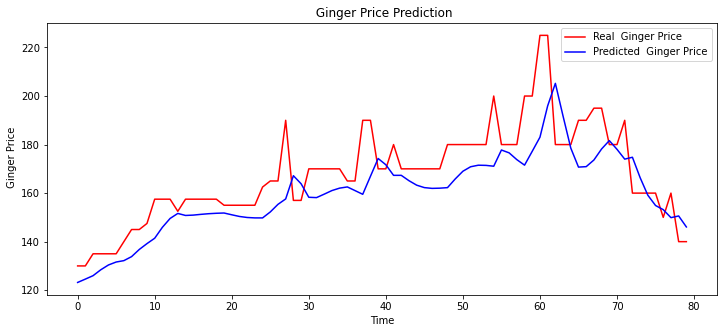

In [155]:
plt.plot(original, color = 'red', label = 'Real  Ginger Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Ginger Price')
plt.title(' Ginger Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Ginger Price')
plt.legend()
plt.show()

In [156]:
mean_absolute_error(original, pred)

10.461974811553954

In [157]:
mean_squared_error(original, pred)

176.7043148064673

In [158]:
rmse(pred, original)

13.293017520731224